## Daniel Campanha -- 0050011906

In [2]:
import pandas as pd

In [3]:
from sklearn.datasets import load_boston

In [95]:
dataset = load_boston()

In [96]:
print(dataset)

{'DESCR': "Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per

In [35]:
dataset = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [78]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [37]:
dataset.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


## O Campo resposta é LSTAT

In [38]:
import seaborn as sns

In [39]:
%matplotlib inline

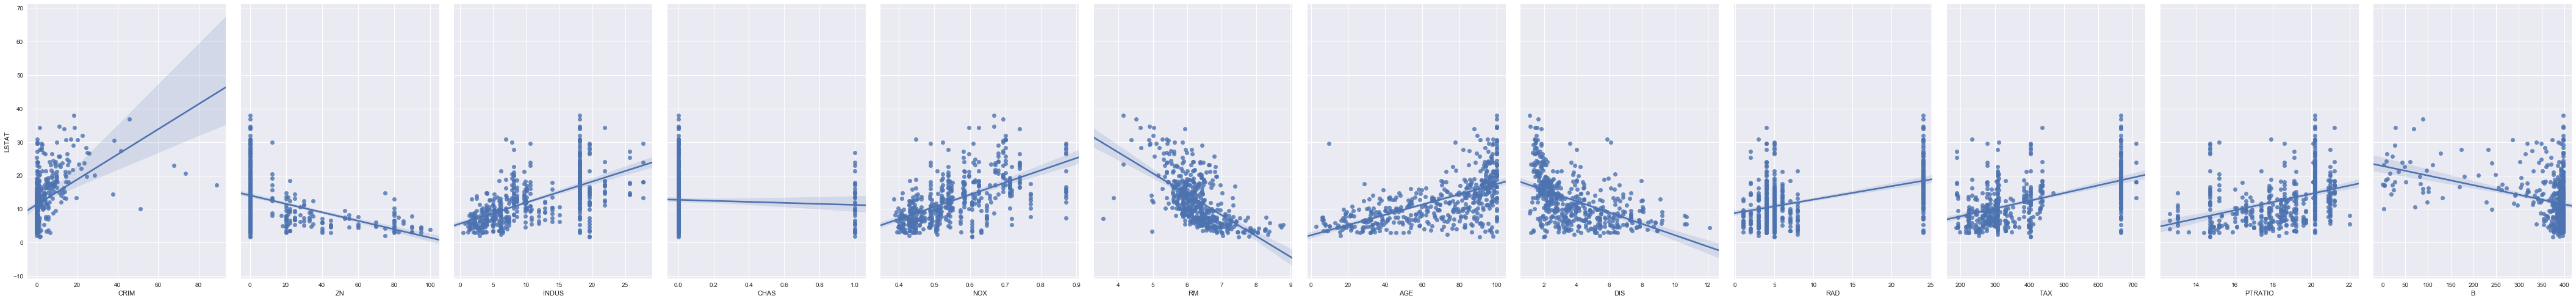

In [44]:
sns.pairplot(dataset, x_vars=['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS','RAD','TAX','PTRATIO','B'], y_vars='LSTAT', size=7, aspect=0.7, kind='reg')

In [48]:
feature_cols = ['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS','RAD','TAX','PTRATIO','B']

In [49]:
x = dataset[feature_cols]

In [50]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90


In [51]:
print(type(x))

<class 'pandas.core.frame.DataFrame'>


In [52]:
print(x.shape)

(506, 12)


In [54]:
y = dataset['LSTAT']

In [57]:
print (type(y))

<class 'pandas.core.series.Series'>


In [58]:
y.head()

0    4.98
1    9.14
2    4.03
3    2.94
4    5.33
Name: LSTAT, dtype: float64

In [59]:
print(y.shape)

(506,)


In [61]:
from sklearn.cross_validation import train_test_split

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [63]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(379, 12)
(379,)
(127, 12)
(127,)


In [64]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [65]:
print(linreg.intercept_)
print(linreg.coef_)

29.1842726974
[  9.35708298e-02   1.83084770e-02   1.03147438e-01  -5.42676000e-01
   5.13563756e+00  -4.39346872e+00   1.02007222e-01   2.46576181e-01
   5.27952825e-02  -1.85506376e-03   1.06236767e-01  -8.25326474e-03]


In [66]:
list(zip(feature_cols, linreg.coef_))

[('CRIM', 0.093570829781467968),
 ('ZN', 0.018308476974245026),
 ('INDUS', 0.10314743823701494),
 ('CHAS', -0.54267600014166673),
 ('NOX', 5.1356375635776557),
 ('RM', -4.3934687232800229),
 ('AGE', 0.102007222054603),
 ('DIS', 0.24657618133701797),
 ('RAD', 0.052795282538529609),
 ('TAX', -0.0018550637643155454),
 ('PTRATIO', 0.10623676736336429),
 ('B', -0.008253264743275146)]

In [67]:
y_pred = linreg.predict(x_test)

In [68]:
print (y_pred)

[  8.9437467    8.98875357  14.23751865   8.41455662  21.15870581
  15.73618349   6.31430367  16.23006005  15.26299127   9.62296363
  12.05695081   5.57490118  13.3670177   10.44301429  14.81332282
  20.86972047  15.74598241   1.85735865   9.20100096  22.22391616
  15.18714917  21.40796341  12.31159222   8.11787772   6.87565958
  22.43507188  16.79005087  10.73081248   7.89085481  21.14465508
   8.30635709  15.49479482   0.69172611  17.68362728   7.7915654
  10.46682836  17.47838623   5.84865024  27.80717188  15.66744784
   5.21583594   8.94554048  10.88375916  17.734398    17.43155341
  15.88652174   8.0448376   18.99735894  16.92567453  15.18743074
  10.57842926  10.09439829   9.47707592  15.71068953  21.66228214
  11.55405232  17.52035679  10.53965687  14.60795174   2.88121717
  17.81550988   8.07462043  19.50336113  17.73316068   9.71535504
   6.35364124   2.79298411   8.68431285  10.24255242  16.5800031
   7.5957251   25.95469425  22.6046238   12.24363241  13.61785788
  12.7881103

In [69]:
from sklearn import metrics
import numpy as np
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

4.15387354749


In [70]:
feature_cols = ['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS','RAD','TAX','PTRATIO','B']

In [72]:
x = dataset[feature_cols]

In [73]:
print (x)

         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0     0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900   1.0  296.0   
1     0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
2     0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
3     0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
4     0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622   3.0  222.0   
5     0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622   3.0  222.0   
6     0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605   5.0  311.0   
7     0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505   5.0  311.0   
8     0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821   5.0  311.0   
9     0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921   5.0  311.0   
10    0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467   5.0  311.0   
11    0.11747  12.5   7.87   0.0  0.524  6.009   82.9  6.2267   

In [98]:
from sklearn.datasets import load_boston

In [99]:
boston = load_boston()

In [100]:
print("boston.keys(): \n{}".format(boston.keys()))

boston.keys(): 
dict_keys(['DESCR', 'feature_names', 'target', 'data'])


In [101]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [103]:

print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [105]:
boston.data[1]

array([  2.73100000e-02,   0.00000000e+00,   7.07000000e+00,
         0.00000000e+00,   4.69000000e-01,   6.42100000e+00,
         7.89000000e+01,   4.96710000e+00,   2.00000000e+00,
         2.42000000e+02,   1.78000000e+01,   3.96900000e+02,
         9.14000000e+00])

In [108]:
boston.data.shape

(506, 13)

In [116]:
boston.target

array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,
        18.9,  15. ,  18.9,  21.7,  20.4,  18.2,  19.9,  23.1,  17.5,
        20.2,  18.2,  13.6,  19.6,  15.2,  14.5,  15.6,  13.9,  16.6,
        14.8,  18.4,  21. ,  12.7,  14.5,  13.2,  13.1,  13.5,  18.9,
        20. ,  21. ,  24.7,  30.8,  34.9,  26.6,  25.3,  24.7,  21.2,
        19.3,  20. ,  16.6,  14.4,  19.4,  19.7,  20.5,  25. ,  23.4,
        18.9,  35.4,  24.7,  31.6,  23.3,  19.6,  18.7,  16. ,  22.2,
        25. ,  33. ,  23.5,  19.4,  22. ,  17.4,  20.9,  24.2,  21.7,
        22.8,  23.4,  24.1,  21.4,  20. ,  20.8,  21.2,  20.3,  28. ,
        23.9,  24.8,  22.9,  23.9,  26.6,  22.5,  22.2,  23.6,  28.7,
        22.6,  22. ,  22.9,  25. ,  20.6,  28.4,  21.4,  38.7,  43.8,
        33.2,  27.5,  26.5,  18.6,  19.3,  20.1,  19.5,  19.5,  20.4,
        19.8,  19.4,  21.7,  22.8,  18.8,  18.7,  18.5,  18.3,  21.2,
        19.2,  20.4,  19.3,  22. ,  20.3,  20.5,  17.3,  18.8,  21.4,
        15.7,  16.2,

#### 2 - 506 linhas e 12 colunas

#### 3 - 11 Features

#### 4 - LSTAT é o campo target

#### 5 - Gráfico acima

#### 6 - x = dataset['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS','RAD','TAX','PTRATIO','B']
#### y = dataset['LSTAT']

#### 7 =  class'pandas.core.frame.DataFrame'> e class'pandas.core.series.Series'>

#### 8 - Guarda informações sobre as moradias em Boston, e outros índices

#### 9 - x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

#### 10 - 75% para treino e 25% para teste

#### 11 - from sklearn.linear_model import LinearRegression
#### linreg = LinearRegression()
#### linreg.fit(x_train, y_train)

#### 12 - 29.1842726974
####    [  9.35708298e-02   1.83084770e-02   1.03147438e-01  -5.42676000e-01
####   5.13563756e+00  -4.39346872e+00   1.02007222e-01   2.46576181e-01
####   5.27952825e-02  -1.85506376e-03   1.06236767e-01  -8.25326474e-03]

## 13 - [('CRIM', 0.093570829781467968),('ZN', 0.018308476974245026),('INDUS', 0.10314743823701494),('CHAS', -0.54267600014166673),('NOX', 5.1356375635776557),('RM', -4.3934687232800229), ('AGE', 0.102007222054603),('DIS', 0.24657618133701797),('RAD', 0.052795282538529609),
## ('TAX', -0.0018550637643155454),
## ('PTRATIO', 0.10623676736336429),
## ('B', -0.008253264743275146)]